'joy': 0,
    'fear': 1,
    'anger': 2,
    'sadness': 3,
    'disgust': 4,
    'shame': 5,
    'guilt': 6

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
from wordcloud import WordCloud, STOPWORDS
from collections import defaultdict
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('temp_data.csv')
df.head(5)

,Emotion,Content
0,joy,On days when I feel close to my partner and ot...
1,fear,Every time I imagine that someone I love or I ...
2,anger,When I had been obviously unjustly treated and...
3,sadness,When I think about the short time that we live...
4,disgust,At a gathering I found myself involuntarily si...


EDA

In [ ]:
df.shape

(7516, 2)

In [ ]:
total = df.isnull().sum()
total

Emotion    0
Content    0
dtype: int64

**Distribution of sentiments in the data**

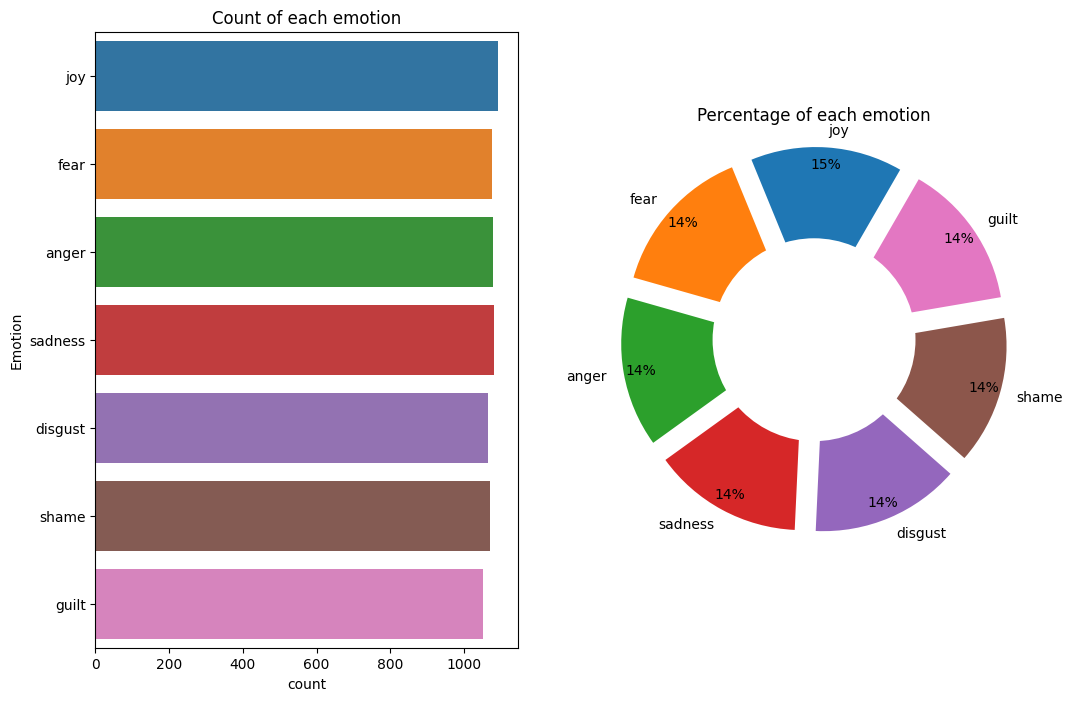

In [ ]:
col = 'Emotion'
fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(12,8))
explode = list((np.array(list(df[col].dropna().value_counts()))/sum(list(df[col].dropna().value_counts())))[::-1])[:10]
labels = list(df[col].dropna().unique())[:10]
sizes = df[col].value_counts()[:10]
#ax.pie(sizes, explode=explode, colors=bo, startangle=60, labels=labels,autopct='%1.0f%%', pctdistance=0.9)
ax2.pie(sizes,  explode=explode, startangle=60, labels=labels,autopct='%1.0f%%', pctdistance=0.9)
ax2.add_artist(plt.Circle((0,0),0.6,fc='white'))
sns.countplot(y =col, data = df, ax=ax1)
ax1.set_title("Count of each emotion")
ax2.set_title("Percentage of each emotion")
plt.show()

In [ ]:
df['char_length'] = df['Content'].apply(lambda x : len(x))
df['token_length'] = df['Content'].apply(lambda x : len(x.split(" ")))

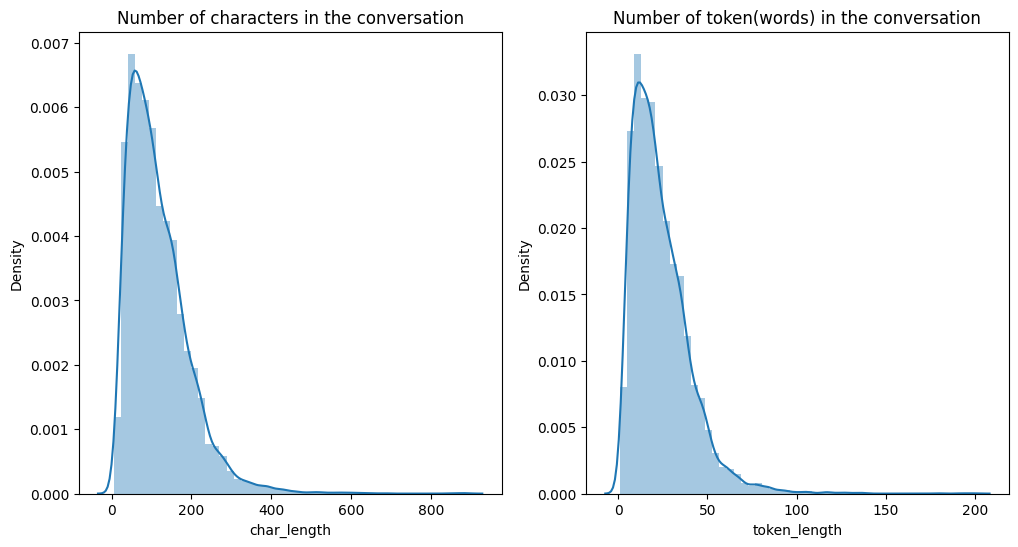

In [ ]:
#Distribution of character length and token length overall
fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
sns.distplot(df['char_length'], ax=ax1)
sns.distplot(df['token_length'], ax=ax2)
ax1.set_title('Number of characters in the conversation')
ax2.set_title('Number of token(words) in the conversation')
plt.show()

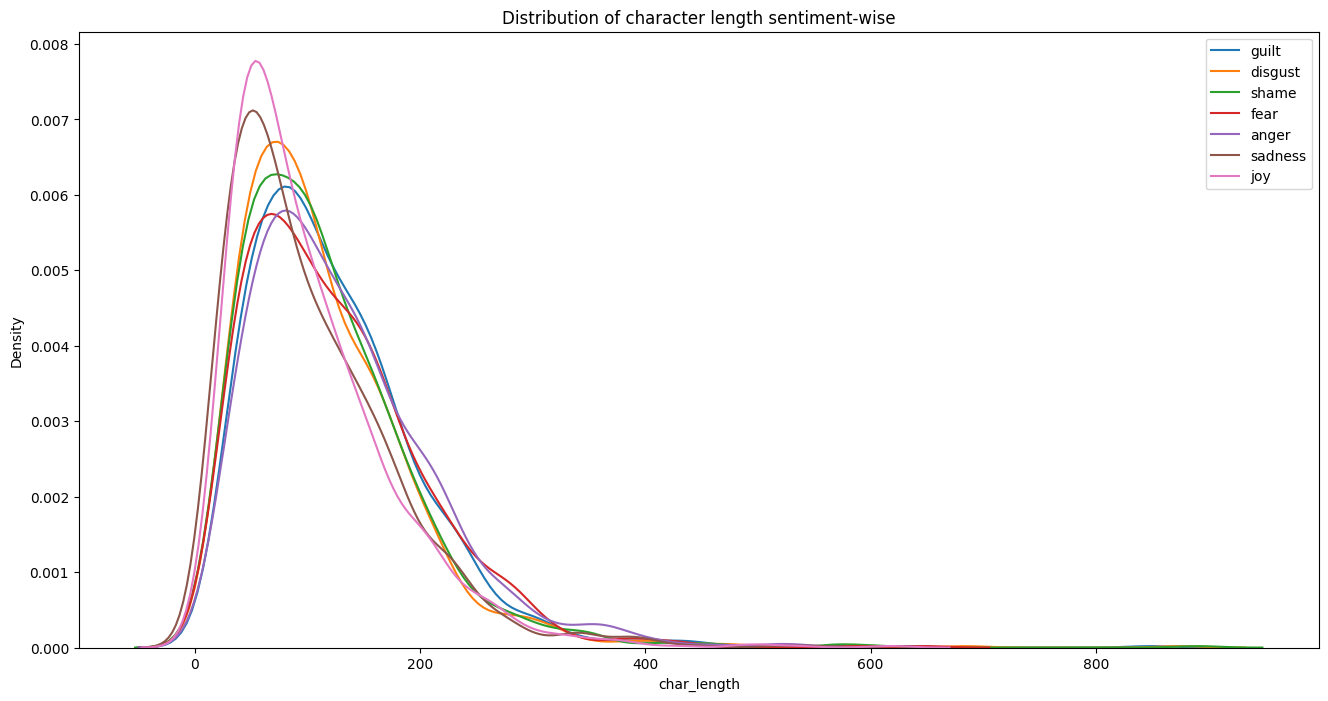

In [ ]:
#Distribution of character length sentiment-wise
fig, ax = plt.subplots(figsize=(16,8))
for sentiment in df['Emotion'].value_counts().sort_values()[-7:].index.tolist():
    #print(sentiment)
    sns.kdeplot(df[df['Emotion']==sentiment]['char_length'],ax=ax, label=sentiment)
ax.legend()
ax.set_title("Distribution of character length sentiment-wise")
plt.show()

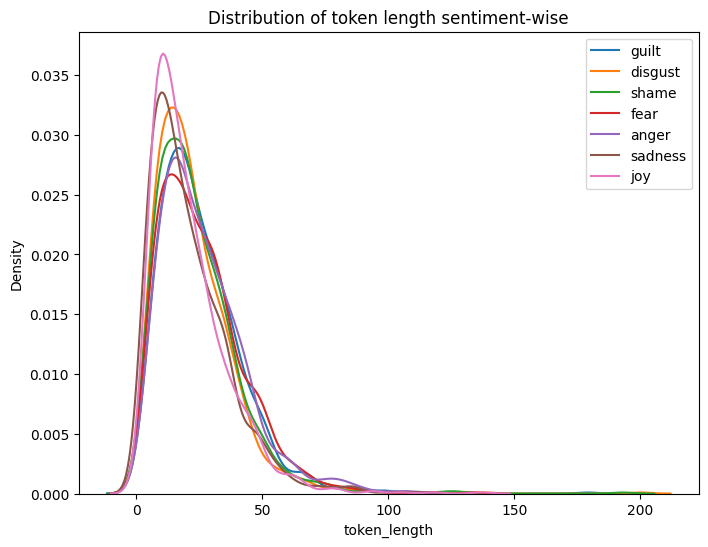

In [ ]:
#Distribution of token length Emotion-wise
fig, ax = plt.subplots(figsize=(8,6))
for sentiment in df['Emotion'].value_counts().sort_values()[-7:].index.tolist():
    #print(sentiment)
    sns.kdeplot(df[df['Emotion']==sentiment]['token_length'],ax=ax, label=sentiment)
ax.legend()
ax.set_title("Distribution of token length sentiment-wise")
plt.show()

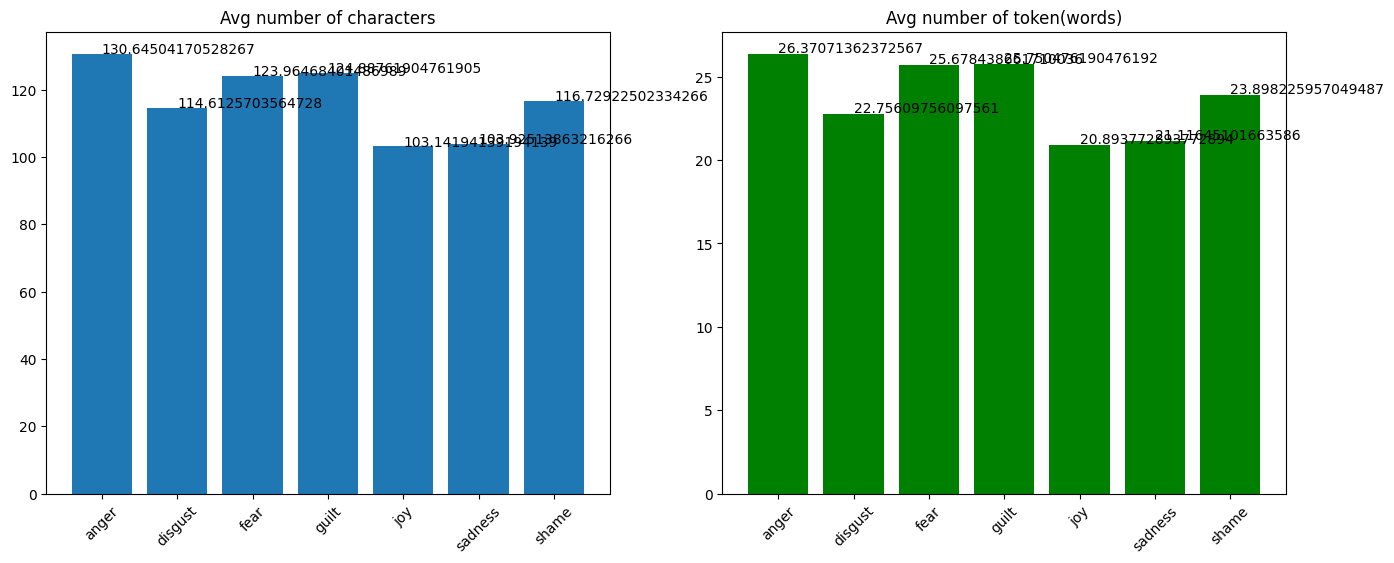

In [ ]:
# Calculate the average character and token lengths
avg_df = df.groupby('Emotion').agg({'char_length':'mean', 'token_length':'mean'})

# Create a figure with two subplots
fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(16,6))

# Plot the bar charts
ax1.bar(avg_df.index, avg_df['char_length'])
ax2.bar(avg_df.index, avg_df['token_length'], color='green')

# Add text to the bar charts
for i in range(len(avg_df)):
    ax1.text(i, avg_df['char_length'].iloc[i] + 0.1, str(avg_df['char_length'].iloc[i]))
    ax2.text(i, avg_df['token_length'].iloc[i] + 0.1, str(avg_df['token_length'].iloc[i]))

# Set the titles and x-tick labels
ax1.set_title('Avg number of characters')
ax2.set_title('Avg number of token(words)')
ax1.set_xticklabels(avg_df.index, rotation = 45)
ax2.set_xticklabels(avg_df.index, rotation = 45)

# Show the plot
plt.show()

1. There are 7 emotions
2. Joy emotional tones are higher than othres.
3. people shares their Anger emotion on longer conversations whereas joy tones have lowest.

#Text Processing

In [ ]:
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 13.9 MB/s eta 0:00:00


In [ ]:
# Data preparation and text-preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import nltk
import inflect
import contractions
from bs4 import BeautifulSoup
import re, string, unicodedata
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

In [ ]:
#### text preprocessing
def text_preprocessing_platform(df, text_col, remove_stopwords=True):

    ## Define functions for individual steps
    # First function is used to denoise text
    def denoise_text(text):
        # Strip html if any. For ex. removing <html>, <p> tags
        soup = BeautifulSoup(text, "html.parser")
        text = soup.get_text()
        # Replace contractions in the text. For ex. didn't -> did not
        text = contractions.fix(text)
        return text

text-normalization

In [ ]:
#### text preprocessing

def text_preprocessing_platform(df, text_col, remove_stopwords=True):

    ## Define functions for individual steps
    # First function is used to denoise text
    def denoise_text(text):
        # Strip html if any. For ex. removing <html>, <p> tags
        soup = BeautifulSoup(text, "html.parser")
        text = soup.get_text()
        # Replace contractions in the text. For ex. didn't -> did not
        text = contractions.fix(text)
        return text

    ## Next step is text-normalization

    # Text normalization includes many steps.

    # Each function below serves a step.


    def remove_non_ascii(words):
        """Remove non-ASCII characters from list of tokenized words"""
        new_words = []
        for word in words:
            new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
            new_words.append(new_word)
        return new_words


    def to_lowercase(words):
        """Convert all characters to lowercase from list of tokenized words"""
        new_words = []
        for word in words:
            new_word = word.lower()
            new_words.append(new_word)
        return new_words


    def remove_punctuation(words):
        """Remove punctuation from list of tokenized words"""
        new_words = []
        for word in words:
            new_word = re.sub(r'[^\w\s]', '', word)
            if new_word != '':
                new_words.append(new_word)
        return new_words


    def replace_numbers(words):
        """Replace all interger occurrences in list of tokenized words with textual representation"""
        p = inflect.engine()
        new_words = []
        for word in words:
            if word.isdigit():
                new_word = p.number_to_words(word)
                new_words.append(new_word)
            else:
                new_words.append(word)
        return new_words


    def remove_stopwords(words):
        """Remove stop words from list of tokenized words"""
        new_words = []
        for word in words:
            if word not in stopwords.words('english'):
                new_words.append(word)
        return new_words


    def stem_words(words):
        """Stem words in list of tokenized words"""
        stemmer = LancasterStemmer()
        stems = []
        for word in words:
            stem = stemmer.stem(word)
            stems.append(stem)
        return stems


    def lemmatize_verbs(words):
        """Lemmatize verbs in list of tokenized words"""
        lemmatizer = WordNetLemmatizer()
        lemmas = []
        for word in words:
            lemma = lemmatizer.lemmatize(word, pos='v')
            lemmas.append(lemma)
        return lemmas


    ### A wrap-up function for normalization
    def normalize_text(words, remove_stopwords):
        words = remove_non_ascii(words)
        words = to_lowercase(words)
        words = remove_punctuation(words)
        words = replace_numbers(words)
        if remove_stopwords:
            words = remove_stopwords(words)
        #words = stem_words(words)
        words = lemmatize_verbs(words)
        return words

    # All above functions work on word tokens we need a tokenizer

    # Tokenize tweet into words
    def tokenize(text):
        return nltk.word_tokenize(text)


    # A overall wrap-up function
    def text_prepare(text):
        text = denoise_text(text)
        text = ' '.join([x for x in normalize_text(tokenize(text), remove_stopwords)])
        return text

    # run every-step
    df[text_col] = [text_prepare(x) for x in df[text_col]]


    # return processed df
    return df

In [ ]:
df.head(5)

,Emotion,Content,char_length,token_length
0,joy,On days when I feel close to my partner and ot...,167,34
1,fear,Every time I imagine that someone I love or I ...,92,18
2,anger,When I had been obviously unjustly treated and...,88,15
3,sadness,When I think about the short time that we live...,139,32
4,disgust,At a gathering I found myself involuntarily si...,144,24


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
print("Before Text Preprocessing")
display(df.head()[['Content']])
processed_df = text_preprocessing_platform(df, 'Content', remove_stopwords=False)
print("After Text Preprocessing")
display(processed_df.head()[['Content']])

Before Text Preprocessing


,Content
0,On days when I feel close to my partner and ot...
1,Every time I imagine that someone I love or I ...
2,When I had been obviously unjustly treated and...
3,When I think about the short time that we live...
4,At a gathering I found myself involuntarily si...


After Text Preprocessing


,Content
0,days feel close partner friends feel peace als...
1,every time imagine someone love could contact ...
2,obviously unjustly treat possibility elucidate
3,think short time live relate periods life thin...
4,gather find involuntarily sit next two people ...


Uni-gram Analysis

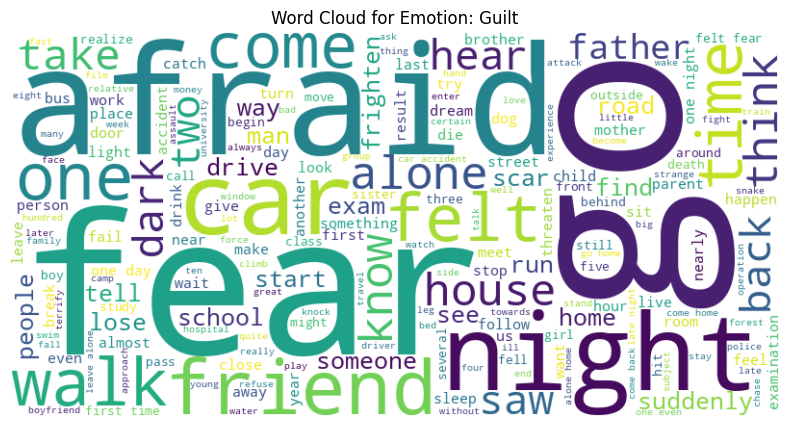

In [ ]:
sadness_df = df[df['Emotion'] == 'fear']

# Concatenate all the 'Content' entries for 'sadness' into a single string
sadness_text = ' '.join(sadness_df['Content'])

# Generate a word cloud for the 'sadness' emotion
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(sadness_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Emotion: Guilt')
plt.axis('off')
plt.show()
#plt.savefig('wordcloud_verb.png', dpi=1500)


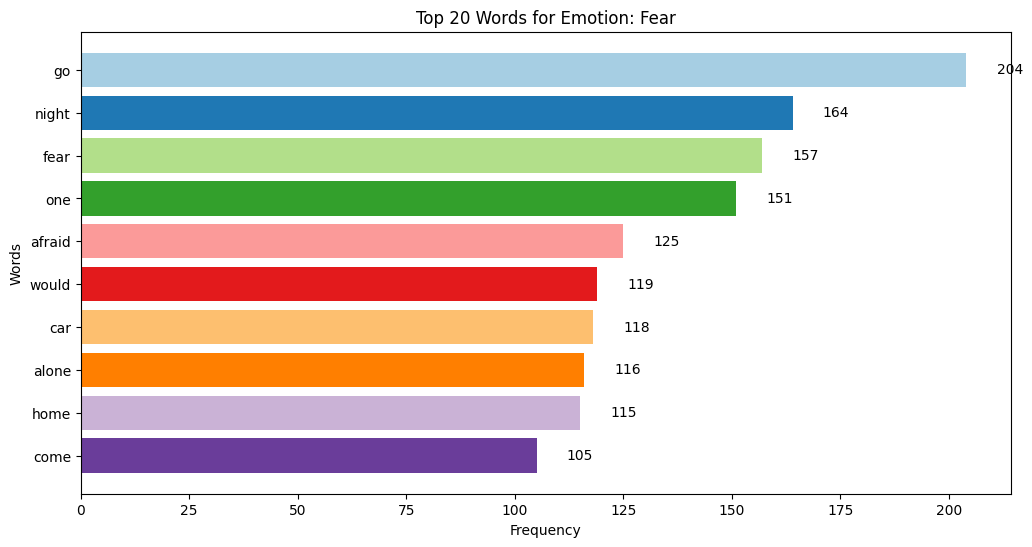

In [ ]:
from collections import Counter
words = sadness_text.split()

# Calculate the frequency of each word
word_freq = Counter(words)

# Get the 20 most common words
most_common_words = word_freq.most_common(10)

# Extract the words and their frequencies
top_words, top_word_freq = zip(*most_common_words)

# Define a custom color palette
colors = plt.cm.Paired(range(len(top_words)))
# Create a bar graph with custom colors
plt.figure(figsize=(12, 6))
bars = plt.barh(range(len(top_words)), top_word_freq, color=colors)
plt.yticks(range(len(top_words)), top_words)
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 20 Words for Emotion: Fear')

# Add color legend
for i, bar in enumerate(bars):
    plt.text(bar.get_width() + 10, bar.get_y() + bar.get_height() / 2, top_word_freq[i], ha='center', va='center', color='black', fontsize=10)

plt.gca().invert_yaxis()  # Invert the y-axis to display the most frequent words at the top
plt.show()


# Model Development


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Content'], df['Emotion'], test_size=0.2, random_state=42)

# Preprocess the text data (e.g., tokenization, stop word removal, etc.)
# You can use more advanced preprocessing techniques if needed.

# Feature extraction using TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Model 1: Multinomial Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
nb_pred = nb_model.predict(X_test_tfidf)

# Model 2: Support Vector Machine (SVM)
svm_model = SVC()
svm_model.fit(X_train_tfidf, y_train)
svm_pred = svm_model.predict(X_test_tfidf)

# Model 3: Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train_tfidf, y_train)
rf_pred = rf_model.predict(X_test_tfidf)

# Evaluate model performance
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    report = classification_report(y_true, y_pred, target_names=df['Emotion'].unique())

    # Split the report into lines and extract precision, recall, and f1-score values
    report_lines = report.split('\n')
    overall_metrics = report_lines[-2]  # The second last line contains overall metrics
    print(f"*** {model_name} ***")
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(report)
    print("Overall Metrics:")
    print(overall_metrics)

evaluate_model(y_test, nb_pred, "Multinomial Naive Bayes")
evaluate_model(y_test, svm_pred, "Support Vector Machine")
evaluate_model(y_test, rf_pred, "Random Forest")


*** Multinomial Naive Bayes ***
Accuracy: 0.54
Classification Report:
              precision    recall  f1-score   support

         joy       0.48      0.44      0.46       227
        fear       0.65      0.53      0.59       204
       anger       0.56      0.66      0.61       200
     sadness       0.44      0.44      0.44       209
     disgust       0.65      0.70      0.67       233
       shame       0.50      0.60      0.54       205
       guilt       0.52      0.45      0.48       226

    accuracy                           0.54      1504
   macro avg       0.54      0.54      0.54      1504
weighted avg       0.54      0.54      0.54      1504

Overall Metrics:
weighted avg       0.54      0.54      0.54      1504
*** Support Vector Machine ***
Accuracy: 0.58
Classification Report:
              precision    recall  f1-score   support

         joy       0.45      0.51      0.48       227
        fear       0.59      0.56      0.58       204
       anger       0.62      0

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Build a Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train_tfidf, y_train)
# Make predictions on the test set
y_pred = decision_tree_model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.4833776595744681
Classification Report:
              precision    recall  f1-score   support

       anger       0.37      0.32      0.34       227
     disgust       0.52      0.48      0.50       204
        fear       0.48      0.61      0.54       200
       guilt       0.43      0.38      0.40       209
         joy       0.53      0.60      0.56       233
     sadness       0.57      0.57      0.57       205
       shame       0.47      0.43      0.45       226

    accuracy                           0.48      1504
   macro avg       0.48      0.49      0.48      1504
weighted avg       0.48      0.48      0.48      1504



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Build a K-Nearest Neighbors (KNN) Classifier
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k) as needed
knn_model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.3829787234042553
Classification Report:
              precision    recall  f1-score   support

       anger       0.29      0.26      0.27       227
     disgust       0.40      0.31      0.35       204
        fear       0.36      0.67      0.47       200
       guilt       0.39      0.17      0.23       209
         joy       0.38      0.70      0.49       233
     sadness       0.47      0.37      0.42       205
       shame       0.52      0.21      0.30       226

    accuracy                           0.38      1504
   macro avg       0.40      0.38      0.36      1504
weighted avg       0.40      0.38      0.36      1504



Convolutional Neural Network (CNN)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from keras.models import Sequential
from sklearn.preprocessing import LabelEncoder


# Split the dataset into features (X) and the target variable (y)
X = df['Content']
y = df['Emotion']
num_classes = 7

# Encode emotion labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Tokenize and pad sequences
max_words = 5000
max_sequence_length = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X)
X_sequences = tokenizer.texts_to_sequences(X)
X_padded = pad_sequences(X_sequences, maxlen=max_sequence_length)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.25, random_state=42)

# Build CNN model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_sequence_length))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.25)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


Epoch 1/20
67/67 [==============================] - 12s 164ms/step - loss: 1.9341 - accuracy: 0.1862 - val_loss: 1.8973 - val_accuracy: 0.3333
Epoch 2/20
67/67 [==============================] - 11s 160ms/step - loss: 1.6618 - accuracy: 0.4372 - val_loss: 1.3789 - val_accuracy: 0.5234
Epoch 3/20
67/67 [==============================] - 9s 142ms/step - loss: 1.0646 - accuracy: 0.6522 - val_loss: 1.2047 - val_accuracy: 0.5560
Epoch 4/20
67/67 [==============================] - 10s 143ms/step - loss: 0.6511 - accuracy: 0.8003 - val_loss: 1.2273 - val_accuracy: 0.5638
Epoch 5/20
67/67 [==============================] - 11s 160ms/step - loss: 0.3759 - accuracy: 0.8947 - val_loss: 1.3513 - val_accuracy: 0.5652
Epoch 6/20
67/67 [==============================] - 11s 161ms/step - loss: 0.2328 - accuracy: 0.9411 - val_loss: 1.5237 - val_accuracy: 0.5582
Epoch 7/20
67/67 [==============================] - 11s 160ms/step - loss: 0.1542 - accuracy: 0.9605 - val_loss: 1.6297 - val_accuracy: 0.5525


In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Predict using the model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Inverse transform encoded labels to original emotion labels
y_test_labels = label_encoder.inverse_transform(y_test)
y_pred_labels = label_encoder.inverse_transform(y_pred_classes)

# Generate classification report
report = classification_report(y_test_labels, y_pred_labels)
print("Classification Report:")
print(report)

59/59 [==============================] - 2s 40ms/step - loss: 2.7321 - accuracy: 0.5285
Test Loss: 2.7321
Test Accuracy: 0.5285
59/59 [==============================] - 4s 58ms/step
Classification Report:
              precision    recall  f1-score   support

       anger       0.48      0.41      0.44       293
     disgust       0.45      0.56      0.50       243
        fear       0.57      0.68      0.62       253
       guilt       0.46      0.42      0.44       269
         joy       0.69      0.63      0.66       278
     sadness       0.59      0.60      0.59       273
       shame       0.45      0.43      0.44       270

    accuracy                           0.53      1879
   macro avg       0.53      0.53      0.53      1879
weighted avg       0.53      0.53      0.53      1879



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout, LSTM, Reshape
from keras.models import Sequential
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# ... (Your data preprocessing code)

# Build CNN model with LSTM layer
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_sequence_length))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Reshape((1, 128)))  # Reshape for compatibility with LSTM
model.add(LSTM(64))  # Add an LSTM layer for capturing long-range dependencies
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.25)

# Evaluate the model and generate a classification report
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_labels = label_encoder.inverse_transform(y_test)
y_pred_labels = label_encoder.inverse_transform(y_pred_classes)

report = classification_report(y_test_labels, y_pred_labels)
print("Classification Report:")
print(report)


Epoch 1/20
67/67 [==============================] - 15s 165ms/step - loss: 1.9420 - accuracy: 0.1639 - val_loss: 1.9238 - val_accuracy: 0.2539
Epoch 2/20
67/67 [==============================] - 11s 158ms/step - loss: 1.6384 - accuracy: 0.3527 - val_loss: 1.3831 - val_accuracy: 0.5021
Epoch 3/20
67/67 [==============================] - 11s 158ms/step - loss: 1.0471 - accuracy: 0.6125 - val_loss: 1.2562 - val_accuracy: 0.5518
Epoch 4/20
67/67 [==============================] - 12s 174ms/step - loss: 0.6196 - accuracy: 0.7939 - val_loss: 1.4327 - val_accuracy: 0.5567
Epoch 5/20
67/67 [==============================] - 10s 145ms/step - loss: 0.3520 - accuracy: 0.9006 - val_loss: 1.6612 - val_accuracy: 0.5319
Epoch 6/20
67/67 [==============================] - 10s 153ms/step - loss: 0.2121 - accuracy: 0.9427 - val_loss: 1.8724 - val_accuracy: 0.5482
Epoch 7/20
67/67 [==============================] - 11s 162ms/step - loss: 0.1392 - accuracy: 0.9640 - val_loss: 2.1303 - val_accuracy: 0.5262

Long Short-Term Memory (LSTM)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.models import Sequential
from sklearn.preprocessing import LabelEncoder

# Split the dataset into features (X) and the target variable (y)
X = df['Content']
y = df['Emotion']

# Encode emotion labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Tokenize and pad sequences
max_words = 10000
max_sequence_length = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X)
X_sequences = tokenizer.texts_to_sequences(X)
X_padded = pad_sequences(X_sequences, maxlen=max_sequence_length)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.25, random_state=42)

# Build LSTM model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_sequence_length))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


Epoch 1/10
71/71 [==============================] - 68s 871ms/step - loss: 1.8995 - accuracy: 0.2606 - val_loss: 1.7282 - val_accuracy: 0.3635
Epoch 2/10
71/71 [==============================] - 56s 791ms/step - loss: 1.3459 - accuracy: 0.5462 - val_loss: 1.2801 - val_accuracy: 0.5576
Epoch 3/10
71/71 [==============================] - 67s 938ms/step - loss: 0.8684 - accuracy: 0.7181 - val_loss: 1.2272 - val_accuracy: 0.5798
Epoch 4/10
71/71 [==============================] - 51s 721ms/step - loss: 0.5969 - accuracy: 0.8135 - val_loss: 1.3106 - val_accuracy: 0.5718
Epoch 5/10
71/71 [==============================] - 63s 885ms/step - loss: 0.4225 - accuracy: 0.8674 - val_loss: 1.4792 - val_accuracy: 0.5559
Epoch 6/10
71/71 [==============================] - 54s 759ms/step - loss: 0.3202 - accuracy: 0.9062 - val_loss: 1.5453 - val_accuracy: 0.5381
Epoch 7/10
71/71 [==============================] - 58s 822ms/step - loss: 0.2332 - accuracy: 0.9315 - val_loss: 1.6878 - val_accuracy: 0.5230

NaiveBayes

In [ ]:
from __future__ import division
import nltk
import re
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import *
import sklearn
from sklearn.model_selection import train_test_split
from textblob.classifiers import NaiveBayesClassifier
from sklearn.model_selection import cross_val_score
from nltk.classify.naivebayes import NaiveBayesClassifier
from gensim import corpora, models, similarities
from nltk.corpus import wordnet as wn
import urllib
import urllib.request as urllib2

In [ ]:
Data = pd.read_csv('ISEAR (1).csv',header=None)
emotion_labels = ['joy', 'fear', 'anger', 'sadness', 'disgust', 'shame', 'guilt']
negation_words = ['not', 'neither', 'nor', 'but', 'however', 'although', 'nonetheless', 'despite', 'except', 'even though', 'yet']

In [ ]:
def class_labels(emotions):
    labels = []
    labelset = []
    exclude = []
    for i in range(len(emotions)):
#         labels.append(e)
#         labelset.append([e])
        if emotions[i] not in ['shame','guilt']:
            labels.append(e)
            labelset.append([e])
        else:
            exclude.append(i)
    return labels, labelset, exclude

In [ ]:
def removal(sentences):
    sentence_list = []
    count = 0
#     for sen in sentences:
#         count += 1
#         print count
#         print sen
#         print type(sen)
    s = nltk.word_tokenize(sentences)
    characters = ["á", "\xc3", "\xa1", "\n", ",", ".", "[", "]", ""]
    l = []
    for t in s:
        if t not in characters:
            l.append(t)
    return l

In [ ]:
'''
POS-TAGGER, returns NAVA words
'''
def pos_tag(sentences):
    tags = [] #have the pos tag included
    nava_sen = []
    pt = nltk.pos_tag(sentences)
#     for s in sentences:
#     s_token = nltk.word_tokenize(sentences)
#     pt = nltk.pos_tag(s_token)
    nava = []
    nava_words = []
    for t in pt:
        if t[1].startswith('NN') or t[1].startswith('JJ') or t[1].startswith('VB') or t[1].startswith('RB'):
            nava.append(t)
            nava_words.append(t[0])
    return nava, nava_words

In [ ]:
'''
Performs stemming
'''
def stemming(sentences):
    sentence_list = []
    sen_string = []
    sen_token = []
    stemmer = PorterStemmer()
    i = 0
#     for sen in sentences:
#         print i,
    i += 1
    st = ""
    for word in sentences:
        word_l = word.lower()
        if len(word_l) >= 3:
            st += stemmer.stem(word_l) + " "
    sen_string.append(st)
    w_set = nltk.word_tokenize(st)
    sen_token.append(w_set)
    w_text = nltk.Text(w_set)
    sentence_list.append(w_text)
    return w_text, st, w_set

In [ ]:
'''
Write to file
'''
def write_to_file(filename, text):
    o = open(filename,'w')
    o.write(str(text))
    o.close()

In [ ]:
'''
Creating the dataframe
'''
def create_frame(Data):
    labels = []
#     sentences = []
#     sen_string = []
#     sen_token =[]
    sen = []
    sen_s = []
    sen_t = []
    labelset = []
    for i in range(len(Data)):
        if i >= 0:
#             print i,
            emotion = Data[0][i]
            sit = Data[1][i]
#             if emotion not in ['shame', 'guilt']:
            labels.append(emotion)
            labelset.append([emotion])
            sent = removal(sit)
            nava, sent_pt = pos_tag(sent)
            sentences, sen_string, sen_token = stemming(sent_pt)
            sen.append(sentences)
            sen_s.append(sen_string)
            sen_t.append(sen_token)
#     labels, labelset, exclude = class_labels(emotions[1:])
#     sent = removal(sit[1:], exclude)
#     nava, sent_pt = pos_tag(sent)
#     sentences, sen_string, sen_token = stemming(sent_pt)
    frame = pd.DataFrame({0 : labels,
                          1 : sen,
                          2 : sen_s,
                          3 : sen_t,
                          4 : labelset})
    return frame, sen_t, labels, sen_s

In [ ]:
c, st, labels, senten = create_frame(Data)

In [ ]:
c

,0,1,2,3,4
0,Emotion,(content),content,[content],[Emotion]
1,joy,"(day, feel, close, partner, other, friend, fee...",day feel close partner other friend feel peac ...,"[day, feel, close, partner, other, friend, fee...",[joy]
2,fear,"(time, imagin, someon, love, contact, seriou, ...",time imagin someon love contact seriou ill eve...,"[time, imagin, someon, love, contact, seriou, ...",[fear]
3,anger,"(had, been, obvious, unjustli, treat, had, pos...",had been obvious unjustli treat had possibl el...,"[had, been, obvious, unjustli, treat, had, pos...",[anger]
4,sadness,"(think, short, time, live, relat, period, life...",think short time live relat period life think ...,"[think, short, time, live, relat, period, life...",[sadness]
...,...,...,...,...,...
7512,shame,"(year, back, someon, invit, tutor, grand-daugh...",year back someon invit tutor grand-daught gran...,"[year, back, someon, invit, tutor, grand-daugh...",[shame]
7513,shame,"(had, taken, respons, someth, had, prepar, how...",had taken respons someth had prepar howev fail...,"[had, taken, respons, someth, had, prepar, how...",[shame]
7514,fear,"(wa, home, heard, loud, sound, spit, door, tho...",wa home heard loud sound spit door thought fam...,"[wa, home, heard, loud, sound, spit, door, tho...",[fear]
7515,guilt,"(did, not, homework, teacher, had, ask, wa, sc...",did not homework teacher had ask wa scold immedi,"[did, not, homework, teacher, had, ask, wa, sc...",[guilt]


In [ ]:
'''
Reads the emotion representative words file
'''
def readfile(filename):
    f = open(filename,'r')
    representative_words = []
    for line in f.readlines():
        characters = ["\n", " ", "\r", "\t"]
        new = ''.join([i for i in line if not [e for e in characters if e in i]])
        representative_words.append(new)
    return representative_words

In [ ]:
'''
Makes a list of all words semantically related to an emotion and Stemming
'''
def affect_wordlist(words):
    affect_words = []
    stemmer = PorterStemmer()
    for w in words:
        w_l = w.lower()
        word_stem = stemmer.stem(w_l)
        if word_stem not in affect_words:
            affect_words.append(word_stem)
    return affect_words

In [ ]:
'''
Creating an emotion wordnet
'''
def emotion_word_set(emotions):
    word_set = {}
    for e in emotions:
        representative_words = readfile(e)
        wordlist = affect_wordlist(representative_words)
        word_set[e] = wordlist
    return word_set

In [ ]:
'''
Lexicon based approach - Check for lexicons
'''
def lexicon_based(sentences, word_set):
    text_vector = []
    for sen in sentences:
        s_vector = []
        for word in sen:
            w_vector = {}
            for emo in word_set:
                if word in word_set[emo]:
#                     print word
                    try:
                        if emo not in w_vector[word]:
                            w_vector[word].append(emo)
                    except KeyError:
                        w_vector[word] = [emo]
            if w_vector:
                s_vector.append(w_vector)
        if not s_vector:
            text_vector.append(s_vector)
        else:
            text_vector.append(s_vector)
    return text_vector

In [ ]:
'''
Lexicon based approach - Classify based on lexicons
'''
def classify_lexicon(text_vector, labels, emotion_labels):
    count = 0
    total = 0
    for j in range(len(text_vector)):
        sen = text_vector[j]
        sen_emo = np.empty(len(emotion_labels))
        sen_emo.fill(0)
        if sen:
            total += 1
            w_emo = []
            for word in sen:
                emotions =  word.values()[0][0]
#                 print emotions, type(emotions), j
                w_emo.append(emotions)
                i = emotion_labels.index(emotions)
                sen_emo[i] += 1
#             print sen_emo
            winner = np.argwhere(sen_emo == np.amax(sen_emo))
            indices = winner.flatten().tolist()
            for i in indices:
                if emotion_labels[i] == labels[j]:
                    count += 1
                    break
#                 else:
#                     print j, text_vector[j]
    accuracy = count/len(text_vector)
    tot_accuracy = count/total
    return accuracy, tot_accuracy

In [ ]:
'''
Calculate pmi
'''
def pmi(x, y, sentences):
    count_x = 1
    count_y = 1
    count_xy = 1
    for sen in sentences:
        if x and y in sentences:
            count_xy += 1
            count_x += 1
            count_y += 1
        if x in sentences:
            count_x += 1
        if y in sentences:
            count_y += 1
        result = count_xy/(count_x * count_y)
    return result

In [ ]:
'''
Getting synonyms from wordnet synsets
'''
def get_synonyms():
    syn = {}
    for e in emotion_labels:
        jw = wn.synsets(e)
        for s in jw:
            v = s.name()
            try:
                syn[e].append(wn.synset(v).lemma_names())
            except KeyError:
                syn[e] = wn.synset(v).lemma_names()

In [ ]:
'''
Creating training/testing set for Naive Bayes classifier TextBlob -- Not used
'''
def create_dataset_textblob(sentences, emotions):
    train = []
    sen = []
    emo = []
    for s in sentences:
        sen.append(s)
    for e in emotions:
        emo.append(e)
    for i in range(len(sen)):
        s = sen[i]
        e = emo[i]
        train.append((str(s), e))
    return train

In [ ]:
'''
Testing for Naive Bayes Classifier
'''
def testing(cl, test):
    for s, e in test:
        r = cl.classify(s)
        print (s, e, r)
        if r == e:
            print ("*")

In [ ]:
'''
Create dataset for nltk Naive Bayes
'''
def create_data(sentence, emotion):
    data = []
    for i in range(len(sentence)):
        sen = []
        for s in sentence[i]:
            sen.append(str(s))
        emo = emotion[i]
        data.append((sen, emo))
    return data

In [ ]:
'''
Get all words in dataset
'''
def get_words_in_dataset(dataset):
    all_words = []
    for (words, sentiment) in dataset:
        all_words.extend(words)
    return all_words

In [ ]:
'''
Getting frequency dist of words
'''
def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    word_features = wordlist.keys()
    return word_features

In [ ]:
'''
Extacting features
'''
def extract_features(document):
    document_words = set(document)
    features = {}
    for word in word_features:
        features['contains(%s)' % word] = (word in document_words)
    return features

In [ ]:
'''
Create test data
'''
def create_test(sentence, emotion):
    data = []
    sen = []
    emo = []
    for s in sentence:
        sen.append(str(s))
    for e in emotion:
        emo.append(e)
    for i in range(len(sen)):
        temp = []
        temp.append(sen[i])
        temp.append(emo[i])
        data.append(temp)
    return data

In [ ]:
'''
Classifier
'''
def classify_dataset(data):
    return \
        classifier.classify(extract_features(nltk.word_tokenize(data)))

In [ ]:
'''
Get accuracy
'''
def get_accuracy(test_data, classifier):
    total = accuracy = float(len(test_data))
    for data in test_data:
        if classify_dataset(data[0]) != data[1]:
           # print (data, classify_dataset(data[0]), data[1])
            accuracy -= 1
    print('Total accuracy: %f%% (%d/20).' % (accuracy / total * 100, accuracy))
    final = accuracy / total * 100
    return final

In [ ]:
# Create training and testing data
sen = c[3]
emo = c[0]
l = len(c[3])
limit = (9*l)//10
sente = c[2]
Data = create_data(sen[:limit], emo[:limit])
test_data = create_test(sente[limit:], emo[limit:])

In [ ]:
# extract the word features out from the training data
word_features = get_word_features(\
                    get_words_in_dataset(Data))

In [ ]:
# get the training set and train the Naive Bayes Classifier
training_set = nltk.classify.util.apply_features(extract_features, Data)
classifier = NaiveBayesClassifier.train(training_set)

In [ ]:
Naive_accu = get_accuracy(test_data, classifier)

Total accuracy: 63.164894% (475/20).


#xgboost

In [ ]:
import xgboost as xgb
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Assuming 'X' contains your text data and 'y' contains the labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create a TF-IDF vectorizer for feature extraction
tfidf_vectorizer = TfidfVectorizer()

# Transform the text data into TF-IDF features
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize and train the XGBoost classifier
classifier = xgb.XGBClassifier()
classifier.fit(X_train_tfidf, y_train)

# Predict labels for the test data
y_pred = classifier.predict(X_test_tfidf)

# Generate a classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)


              precision    recall  f1-score   support

           0       0.49      0.44      0.46       293
           1       0.51      0.58      0.54       243
           2       0.59      0.66      0.62       253
           3       0.52      0.45      0.48       269
           4       0.60      0.68      0.64       278
           5       0.61      0.56      0.58       273
           6       0.49      0.47      0.48       270

    accuracy                           0.55      1879
   macro avg       0.54      0.55      0.54      1879
weighted avg       0.54      0.55      0.54      1879



#LightGBM (Light Gradient Boosting Machine)

In [ ]:
import lightgbm as lgb
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Assuming 'X' contains your text data and 'y' contains the labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create a TF-IDF vectorizer for feature extraction
tfidf_vectorizer = TfidfVectorizer()

# Transform the text data into TF-IDF features
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize and train the LightGBM classifier
classifier = lgb.LGBMClassifier()
classifier.fit(X_train_tfidf, y_train)

# Predict labels for the test data
y_pred = classifier.predict(X_test_tfidf)

# Generate a classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.039734 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12715
[LightGBM] [Info] Number of data points in the train set: 5637, number of used features: 497
[LightGBM] [Info] Start training from score -1.970150
[LightGBM] [Info] Start training from score -1.924151
[LightGBM] [Info] Start training from score -1.924151
[LightGBM] [Info] Start training from score -1.976532
[LightGBM] [Info] Start training from score -1.935147
[LightGBM] [Info] Start training from score -1.941308
[LightGBM] [Info] Start training from score -1.951246
              precision    recall  f1-score   support

           0       0.48      0.42      0.44       293
           1       0.47      0.56      0.51       243
           2       0.59      0.65      0.62       253
           3       0.49      0.43      0.46     

#CatBoost

In [ ]:
pip install catboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 2.6 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Assuming 'X' contains your text data and 'y' contains the labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a TF-IDF vectorizer for feature extraction
tfidf_vectorizer = TfidfVectorizer()

# Transform the text data into TF-IDF features
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize and train the CatBoost classifier
classifier = CatBoostClassifier()
classifier.fit(X_train_tfidf, y_train)

# Predict labels for the test data
y_pred = classifier.predict(X_test_tfidf)

# Generate a classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)


Learning rate set to 0.086119
0:	learn: 1.9067160	total: 813ms	remaining: 13m 32s
1:	learn: 1.8774181	total: 1.46s	remaining: 12m 8s
2:	learn: 1.8485336	total: 2.45s	remaining: 13m 34s
3:	learn: 1.8238769	total: 3.48s	remaining: 14m 25s
4:	learn: 1.8048044	total: 4.29s	remaining: 14m 13s
5:	learn: 1.7907622	total: 4.9s	remaining: 13m 31s
6:	learn: 1.7751667	total: 5.64s	remaining: 13m 19s
7:	learn: 1.7628633	total: 6.35s	remaining: 13m 7s
8:	learn: 1.7482521	total: 7.16s	remaining: 13m 8s
9:	learn: 1.7357110	total: 7.82s	remaining: 12m 54s
10:	learn: 1.7229211	total: 8.61s	remaining: 12m 54s
11:	learn: 1.7141328	total: 9.3s	remaining: 12m 46s
12:	learn: 1.7073761	total: 10.1s	remaining: 12m 48s
13:	learn: 1.6966789	total: 11s	remaining: 12m 57s
14:	learn: 1.6882685	total: 11.9s	remaining: 13m 1s
15:	learn: 1.6799759	total: 12.5s	remaining: 12m 51s
16:	learn: 1.6737796	total: 13.3s	remaining: 12m 50s
17:	learn: 1.6663207	total: 14.1s	remaining: 12m 46s
18:	learn: 1.6609904	total: 15.4s	